In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 482 kB/s 
Looking in indexes: https://test.pypi.org/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# import cleaned versions of files

# orderlines_cl.csv
url = 'https://drive.google.com/file/d/1lrSr_vVbXN7QSVSScf68DpWwvCMclK5m/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orderlines = pd.read_csv(path)

# orders_cl.csv
url = 'https://drive.google.com/file/d/1cGjJ9o3vtwjK0Sohyr3YVTccXfnTPijT/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
orders = pd.read_csv(path)

# brands_cl.csv
url = 'https://drive.google.com/file/d/1XGyabaa4mAkjixMk3XPgx_14OoSse3rs/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
brands = pd.read_csv(path)

# products_cl.csv
url = 'https://drive.google.com/file/d/1rHC8M-HG13FtVncImXBydgDtIHyCPH0g/view?usp=sharing' 
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
products = pd.read_csv(path)

In [3]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.set_option('display.max_rows', 1000)
#pd.set_option("display.max_colwidth", 100)


In [4]:
orders['created_date'] = pd.to_datetime(orders['created_date'])
orderlines['date'] = pd.to_datetime(orderlines['date'])

In [5]:
# get product price into orderlines df
orderlines = orderlines.merge(products.filter(['sku', 'price','name','type']), how='left', on='sku')

In [6]:
# get status into orderlines df
orderlines = orderlines.merge(orders.filter(['order_id', 'state', 'total_paid']).rename(columns={'order_id' : 'id_order'}), how='left', on='id_order')

In [7]:
orderlines['discount'] = orderlines.price - orderlines.unit_price

In [8]:
orderlines['total_discount'] = orderlines['discount'] * orderlines['product_quantity']

In [9]:
orderlines['discount_rel'] = (orderlines.discount / orderlines.price)
orderlines['discount_rel']

0        0.457
1        0.070
2        0.322
3        0.134
4        0.206
          ... 
293738   0.139
293739   0.344
293740   0.600
293741   0.333
293742   0.600
Name: discount_rel, Length: 293743, dtype: float64

In [10]:
orderlines['sold'] = orderlines.state.apply(lambda x : 1 if x == 'Completed' else 0) 

In [11]:
orderlines = orderlines.query('id !=1197439')
orderlines = orderlines.query('id !=1268645')

In [12]:
#serching for Hard drive in products category
products.query('name.str.contains("hard drive", case=False) or name.str.contains("Hard Drive") or name.str.contains("SSD") or name.str.contains("HDD")', engine='python')['type'].unique()
products.query('type == "11935397"', engine='python').sample(10)

,sku,name,desc,price,type,max_price_orderlines
6689,GTE0093,G-Technology G-SPEED XL 24TB Studio Thunderbol...,Hardware RAID external storage with 24TB of ca...,3525.580,11935397,NaN
2197,OWC0135,OWC Aura Envoy Pro SSD Card Case,Box Portable External USB 3.0 SSD for MacBook ...,143.990,11935397,NaN
10024,WDT0382-A,Open - WD My Passport 2TB External Hard Drive ...,External Hard Drive USB 3.0 2TB refurbished wi...,124.990,11935397,NaN
4348,LAC0181,LaCie Porsche Design Mobile Hard Drive 2TB USB...,2TB External Hard Drive USB-C and USB 3.0 conn...,134.990,11935397,NaN
4349,LAC0182,LaCie Porsche Design Mobile Hard Drive 4TB USB...,4TB External Hard Drive USB-C and USB 3.0 conn...,199.990,11935397,NaN
5773,WDT0345,Western Digital My Book for Mac 2TB USB 3.0,2TB External Hard Drive USB 3.0 connection for...,114.990,11935397,NaN
6657,GTE0087,G-Technology G-RAID 12TB RAID USB Hard Drive S...,External Storage 12TB (2x6TB) with USB 3.0 con...,881.990,11935397,NaN
3140,WDT0312,Western Digital My Book Pro 12TB Thunderbolt 2,12TB external hard drive and dual Thunderbolt ...,939.990,11935397,NaN
8108,GLY0021,Glyph Blackbox Pro 3TB External Hard Drive USB...,3TB external hard drive with USB-C connection ...,211.990,11935397,NaN
8032,GTE0106,G-Technology G-RAID Thunderbolt Hard Drive 20T...,20TB RAID disk with 2 bays and removable disks...,1358.990,11935397,NaN


In [13]:
#serching for iMac in products category
products.query('name.str.contains("computer", case=False) or name.str.contains("iMac") or name.str.contains("display",case=False)', engine='python')['type'].unique()

array(['1325', '1296', '8696', '12755395', '1405', '14305406', '13005399',
       '12995397', '20642062', '1,46E+11', '1433', '12585395', '1231',
       '12355400', '1298', '12645406', '12215397', '5,74E+15', '1282',
       '11935397', '51882158', '5,43E+15', '5,72E+15', '2,16E+11', '1364',
       '118692158', '13855401'], dtype=object)

In [ ]:
#serching for server in products category
#orderlines['Category'].loc[(orderlines.name.str.contains("Mini Server", case= False) & (orderlines.price>200)) | (orderlines.name.str.contains("Server", case= False) & (orderlines.price>400)) | orderlines.type.isin([['12175397', '1334', '11935397', '1280', '1298', '12655397']])] = 'Servers'


In [ ]:
#serching for Server in products category
products.query('name.str.contains("mini server", case=False) or name.str.contains("server", case= False)', engine='python')['type'].unique()

array(['12175397', '1334', '11935397', '1280', '1298', nan, '12655397'],
      dtype=object)

In [ ]:
#serching for watche in products category
products.query('name.str.contains("watch", case=False)  & price > 200', engine='python')['type'].unique()
#array(['11905404', '24885185', '24895185', '1298', '5185'], dtype=object)
products.query('type == "1298"', engine='python').sample(10)
orderlines['Category'].loc[(orderlines.name.str.contains("Watch",case=False) & (orderlines.price>200)) | orderlines.type.isin([['11905404', '24885185', '24895185', '1298', '5185']])] = 'Watches'
orderlines.loc[orderlines.Category=='Watches']

In [14]:
orderlines.type.fillna('', inplace=True)
orderlines['Category'] = 'Accessory'
orderlines['Category'].loc[orderlines.type.isin(["1,02E+12", "2,17E+11" , "5,39E+11", "5,44E+11" , "21622158", "21632158", "5,45E+15", "9,29E+11", "2158", "1282", "51912158", "5,74E+15", "1282", "51882158", "5,43E+15", "5,72E+15", "2,16E+11", "118692158"])]= 'iMac/MacBook'
orderlines['Category'].loc[orderlines.type.isin(["12141714", "42931714", "13621714", "24861714", "51861714", "1714", "51871714", "12051714", "12031714", "106431714", "113851714","24821716", "51601716", "85641716", "24811716", "85651716", "1716", "21571716", "21561716", "113291716", "113281716", "113271716"])] = 'iPad/Phones'
orderlines['Category'].loc[orderlines.name.str.contains("Tablet") | (orderlines.name.str.contains("Phone") & (orderlines.price>400) )] = 'iPad/Phones'
orderlines['Category'].loc[(orderlines.name.str.contains("Mini Server", case= False) & (orderlines.price>200)) | (orderlines.name.str.contains("Server", case= False) & (orderlines.price>400)) | orderlines.type.isin([['12175397', '1334', '11935397', '1280', '1298', '12655397']])] = 'Servers'
orderlines['Category'].loc[(orderlines.name.str.contains("Watch",case=False) & (orderlines.price>200)) | orderlines.type.isin([['11905404', '24885185', '24895185', '1298', '5185']])] = 'Watches'
orderlines['Category'].loc[orderlines.name.str.contains('service') | orderlines.name.str.contains('Service') | orderlines.name.str.contains('repair')|orderlines.name.str.contains('Repair') | orderlines.name.str.contains('warranty') | orderlines.type.isin(["1,46E+11"])] = 'Service'
orderlines['Category'].loc[orderlines.type.isin(["1416", "4259"])] = 'Software'
orderlines['Category'].loc[orderlines.type.isin(['11935397', '12655397', '12215397', '12995397', '1276', '1433', '1298', '1404'] )] = 'Hard Drive'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


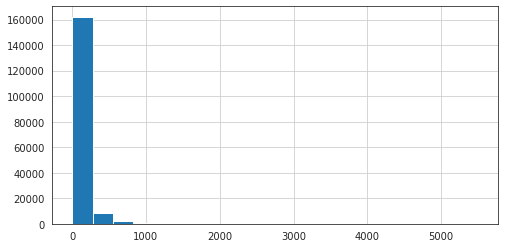

In [ ]:
#then look at the price histogram for accessories
orderlines.query('Category == "Accessory"').price.hist(bins=20, figsize=(8,4))

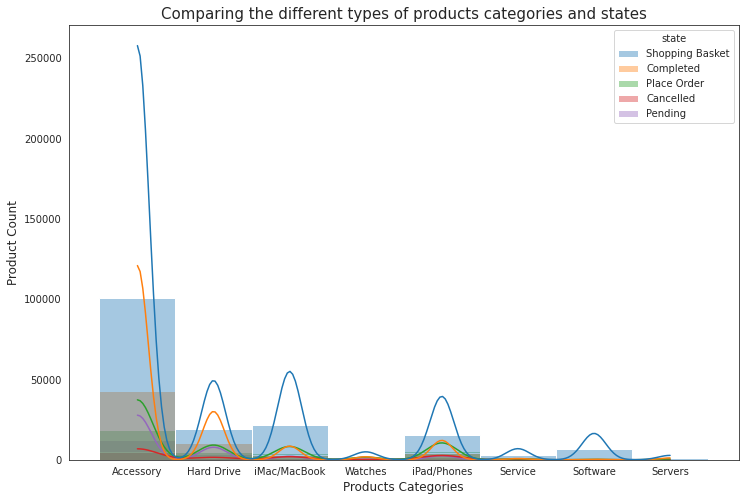

In [ ]:
plt.subplots(figsize=(12, 8))

sns.histplot(data=orderlines, x='Category', hue="state",
             alpha=.4, # add transparency to you chart
             kde=True, # add a density line in the histogram
             bins=20000,
            #palette='Dark2'# define the number of bins the variable total paid will be grouped
             
            )


plt.title('Comparing the different types of products categories and states',fontsize=15)
plt.xlabel('Products Categories', fontsize=12)
plt.ylabel('Product Count',fontsize=12)
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")

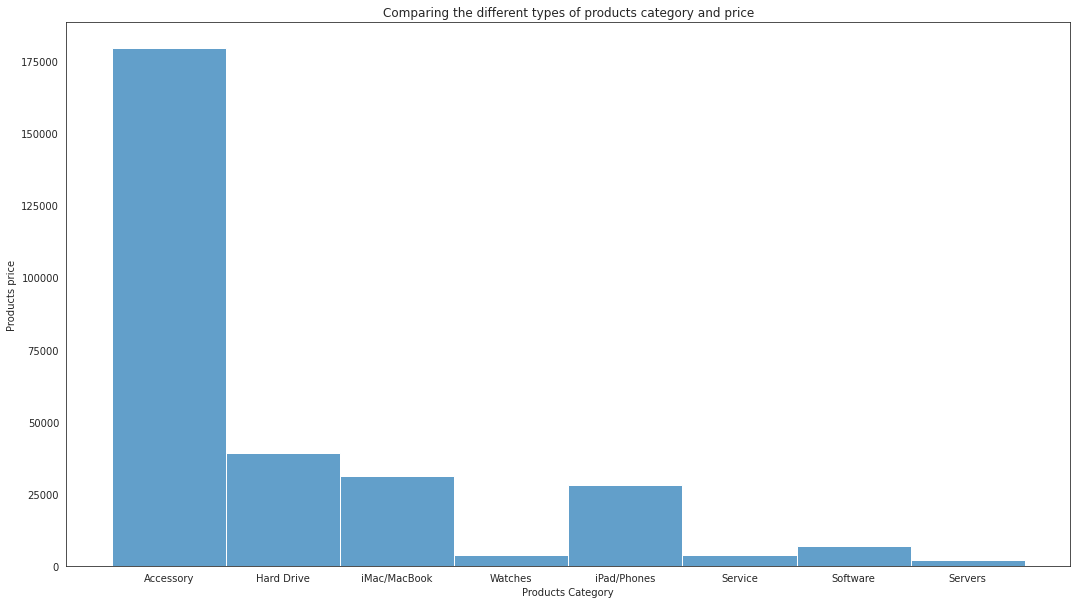

In [ ]:
plt.subplots(figsize=(18, 10))

sns.histplot(data=orderlines, x='Category',
             alpha=.7, # add transparency to you chart
             #kde=True, # add a density line in the histogram
             bins=200000 # define the number of bins the variable total paid will be grouped
            )


plt.title('Comparing the different types of products category and price')
plt.xlabel('Products Category')
plt.ylabel('Products price')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")


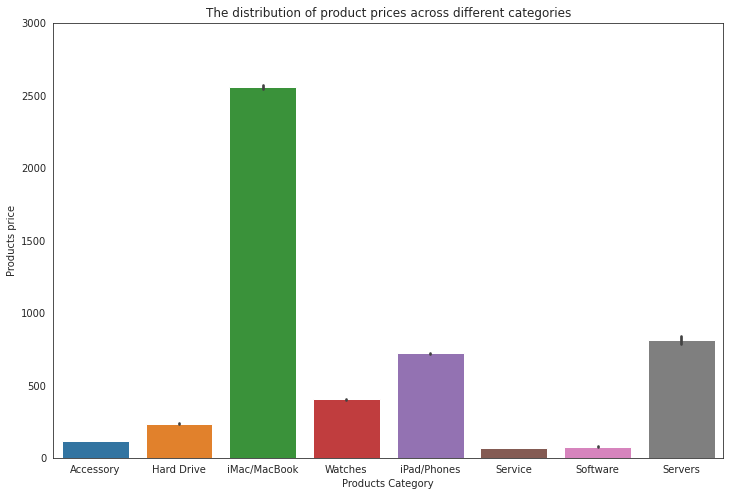

In [ ]:
plt.subplots(figsize=(12, 8))

sns.barplot(data=orderlines, x='Category', y='price')

plt.ylim(0,3000)
plt.title('The distribution of product prices across different categories')
plt.xlabel('Products Category')
plt.ylabel('Products price')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

What is the distribution of product prices across different categories?
○ How many cheap/expensive products do we have?
○ How many sales/revenue do cheap/expensive products generate?

In [ ]:
orderlines['cheap_expensive'] = 'Cheap'
orderlines['cheap_expensive'].loc[(orderlines.price >= 400)] = 'Expensive'
orderlines['cheap_expensive']

In [ ]:
plt.subplots(figsize=(12, 8))

sns.barplot(data=orderlines, x='cheap_expensive', y='price')
sns.color_palette("Paired")

plt.ylim(0,3000)
plt.title('The distribution of product prices across Cheap and expensive categories')
plt.xlabel('Cheap and expensive products')
plt.ylabel('Products price')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

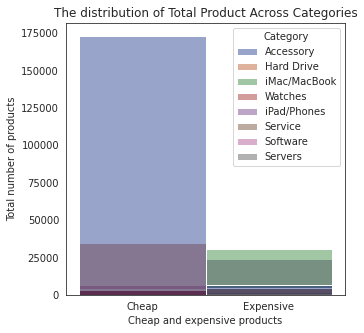

In [ ]:
plt.subplots(figsize=(5,5))

sns.histplot(data=orderlines, x='cheap_expensive', hue="Category",
             alpha=.4, # add transparency to you chart
             #kde=True, # add a density line in the histogram
             bins=500,
             palette='dark'# define the number of bins the variable total paid will be grouped
            )

plt.title('The distribution of Total Product Across Categories')
plt.xlabel('Cheap and expensive products')
plt.ylabel('Total number of products')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

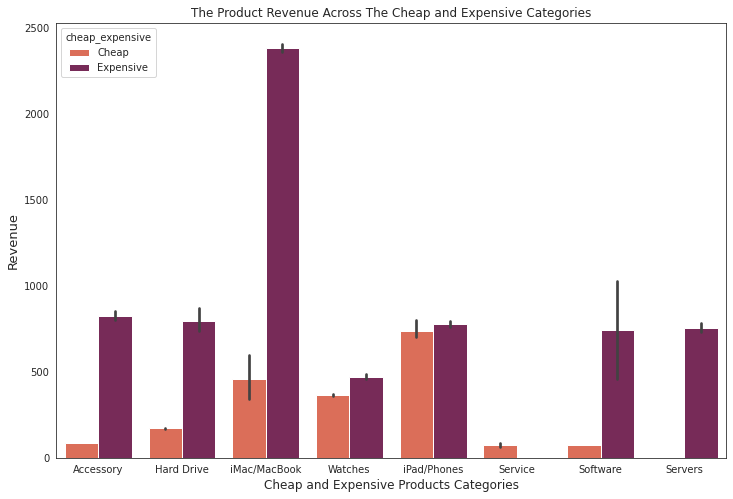

In [ ]:

plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=orderlines,#.query('sold == True').groupby(['Category']).agg({'total_price' : 'sum'}), # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='total_price', # y values on our chart
    hue='cheap_expensive', # group color in our chart
    palette=("rocket_r")
)
plt.title('The Product Revenue Across The Cheap and Expensive Categories',fontsize=12)
plt.xlabel('Cheap and Expensive Products Categories',fontsize=12)
plt.ylabel('Revenue',fontsize=13)
sns.set_style("white")
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show()

In [ ]:
orderlines.loc[orderlines.cheap_expensive=="Cheap"].count()#224912
orderlines.loc[orderlines.cheap_expensive=="Expensive"].count()#68831 #293741 #76.56% #23.43

In [18]:
orderlines.shape

(293741, 20)

In [ ]:
orderlines.query('price < 400', engine='python')['price'].sum() #23013538.540

23013240.539999995

In [ ]:
orderlines.query('price >= 400', engine='python')['price'].sum() #108478350.82

108478350.82

In [ ]:
pep8(_ih)
orderlines.price.sum()

131491591.36

In [ ]:
fig = plt.figure(figsize=(11.7, 18.27))
fig.set_size_inches(11.7, 18.27)

p = sns.relplot(x="Category",
                 y="price",
                 hue="discount",
                # style="Category",
                 data=orderlines,
                 sizes=(20, 200))

p.fig.set_figwidth(18.27)
p.fig.set_figheight(11.7)

In [ ]:
# identify outliers with interquartile range
from numpy import percentile

# calculate interquartile range
q25, q75 = percentile(orderlines_info['price_difference'], 25), percentile(orders_info['price_difference'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 1.5
lower = q25 - cut_off
upper= q75 + cut_off

# identify outliers
#outliers = [x for x in orders_info['price_difference'] if x < lower or x > upper]
#print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in orders_info['price_difference'] if x >= lower and x <= upper]
print('Non-outlier observations after removal of outliers: %d' % len(outliers_removed))

filtered = orders_info.query('-0.024999999999977263<= price_difference <= 0.014999999999986358')

In [ ]:
orderlines.query("discount<0").count() # 11602

In [ ]:
orderlines.query('id ==1197439') #unit_price = 159989.83
#price = 179.


In [ ]:
orderlines = orderlines.query('id !=1197439') # drop #1268645

In [ ]:
orderlines.query("unit_price<0 & sold ==1")


In [ ]:
orderlines = orderlines.query('id !=1268645') #drop

In [ ]:
orderlines['total_discount'] = orderlines.discount * orderlines.product_quantity
orderlines['total_discount']

0         16.000
1         30.000
2        224.950
3         10.610
4          6.160
           ...  
293738     6.960
293739    74.400
293740    30.020
293741    10.000
293742    21.010
Name: total_discount, Length: 293741, dtype: float64

In [ ]:
orders_sold = orderlines.query('sold == 1')
dataframe = (
  orders_sold
    .assign(year = orderlines['date'].dt.strftime('%Y'), 
           month = orderlines['date'].dt.strftime('%b'))
    # get the total paid by each year and month
    .groupby(['year','month'])
    .agg({'total_discount':'sum'})
    # reset the index to user the column vector in our plot
    .reset_index()
)
dataframe

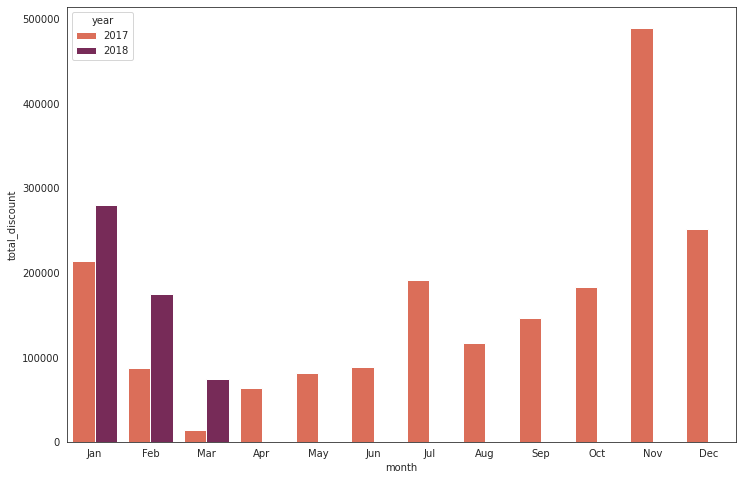

In [ ]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dataframe, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_discount', # y values on our chart
    hue='year', # group color in our chart
    order=months, # order x columns
    palette=("rocket_r")
)

In [ ]:
orderlines['total_discount'] = orderlines.discount * orderlines.product_quantity


In [ ]:
order_placed = orderlines.query('state=="Completed"')


In [ ]:
dataframe = (
  order_placed
    .assign(month = orderlines['date'].dt.strftime('%b'),
            day = orderlines['date'].dt.strftime('%a'))
    # get the total paid by each year and month
    .groupby(['month','day'])
    .agg({'total_discount':'sum'})
    .sort_values('total_discount', ascending=False)
    .reset_index()
    # reset the index to user the column vector in our plot

)
dataframe

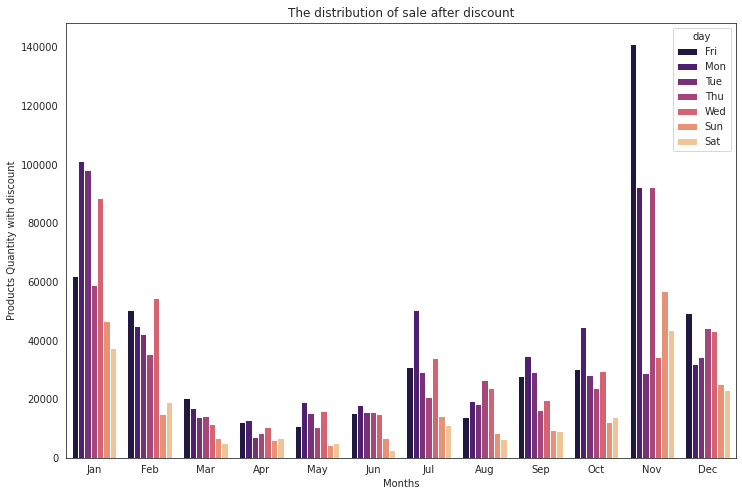

In [ ]:
import matplotlib.pyplot as plt

# Create a list with the months sorted from January to December
# It is going to help us sort our columns appropriately
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dataframe, # dataframe we will use to look for the columns information
    x='month', # x values on our chart
    y='total_discount', # y values on our chart
    hue='day', # group color in our chart
    order=months, # order x columns
    palette=("magma")
)

plt.title('The distribution of sale after discount')
plt.xlabel('Months')
plt.ylabel('Products Quantity with discount')
#sns.despine() # remove the top and right margin, to make your plot prettier 
sns.set_style("white")
plt.show()

In [ ]:
orderlines['any_discount'] = (orderlines.discount > 0)

In [ ]:
orderlines['year_month']=orderlines['date'].dt.strftime('%Y-%m')
orderlines['year_month']#.sort_values('year_month')

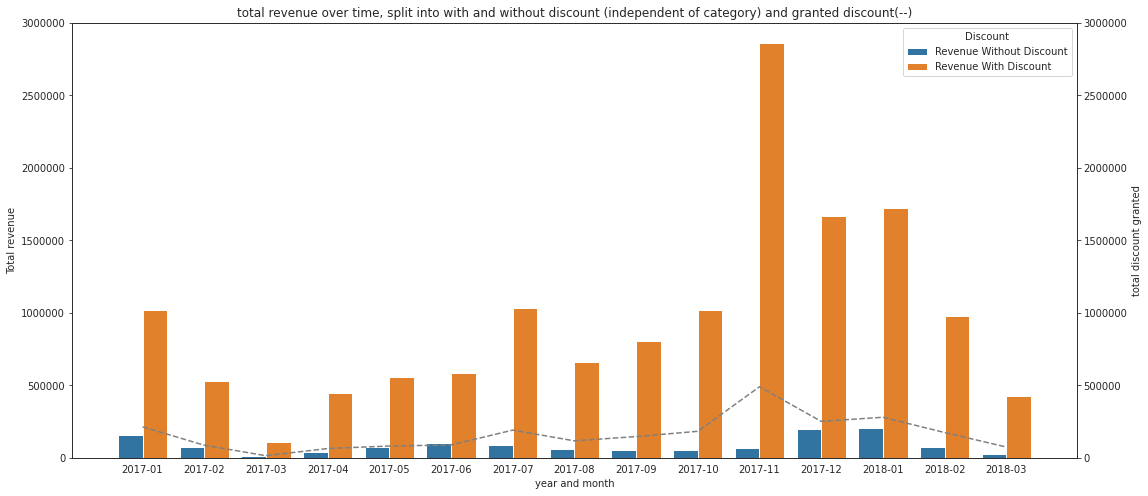

In [ ]:
fig, p1 = plt.subplots(figsize=(18, 8),sharex=True, sharey=True)

p1 = sns.barplot(
    data=orderlines.query('sold == True'), # dataframe we will use to look for the columns information
    x='year_month', # x values on our chart
    y='total_price', # y values on our chart
    hue='any_discount',
    estimator = sum , # adding up, not showing the mean
    ax=p1 ,
    ci=None
)

plt.legend(title='Discount', labels=['Revenue Without Discount', 'Revenue With Discount'])
p1.set_ylim(0,3000000)
p1.set_xlabel('year and month') # x label name
p1.set_ylabel('Total revenue')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

# add line for the total discount granted

p2 = p1.twinx()

p2.plot(orderlines.query('sold == True').groupby(['year_month']).agg({'discount' : 'sum'}).reset_index()['year_month'],
    orderlines.query('sold == True').groupby(['year_month']).agg({'total_discount' : 'sum'}).reset_index()['total_discount'], # value where you want to add your reference line
    linestyle='--', # type of line you would like to see on the plot. You can find more informaiton on its documentation
    color='gray',
)

p2.set_ylim(0,3000000)
p2.set_ylabel('total discount granted')
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis

plt.title('total revenue over time, split into with and without discount (independent of category) and granted discount(--)') # title
plt.show() # show the plot

estimator=It accepts NumPy statistical function like mean, median, max, min to estimate within each categorical bin. In a simple way, you want to set ymax by statistical function then use it.

In [ ]:
#cars.hist(figsize=(12,10));
#orderlines[["discount", "Category"]].sum()


In [ ]:
dataframe = (
  orderlines
    .groupby(['Category'])
    .agg({'total_price':'sum'})
)
dataframe

ValueError: ignored

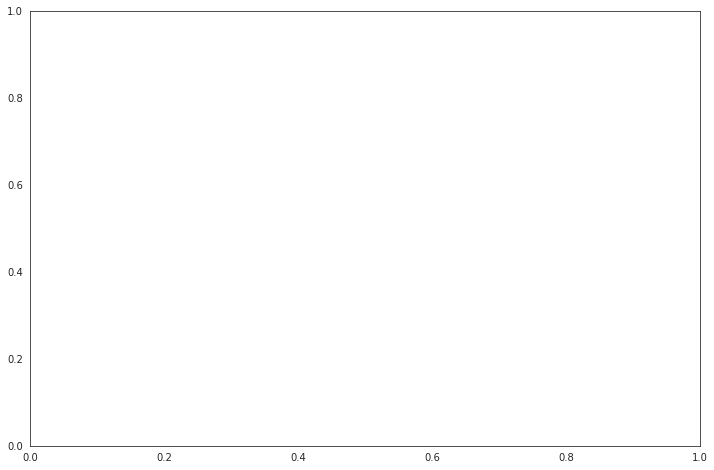

In [ ]:
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=dataframe, # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='total_price', # y values on our chart
    hue='cheap_expensive', # group color in our chart
    palette=("rocket_r")
    )


plt.title('The Product Revenue Across The Cheap and Expensive Categories',fontsize=12)
plt.xlabel('Cheap and Expensive Products Categories',fontsize=12)
plt.ylabel('Revenue',fontsize=13)
sns.set_style("white")
plt.ticklabel_format(style='plain', axis='y') # remove scientific notation for the y axis
plt.show()

In [ ]:
orderlines.discount.describe()

count   284999.000
mean        51.212
std        140.202
min      -5550.000
25%          5.010
50%         16.000
75%         41.000
max       7172.410
Name: discount, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# define the size of the plot
# using matplotlib (plt), which operates together with seaborn
plt.subplots(figsize=(12, 8))

p = sns.barplot(
    data=orderlines, # dataframe we will use to look for the columns information
    x='Category', # x values on our chart
    y='price', # y values on our chart
    hue='discount', # group color in our chart
    #order=months, # order x columns
    palette=("bright")
)

In [ ]:
orderlines.loc[orderlines.Category=="iMac/MacBook"]